# Домашнее задание 2
## На курсе Анализ данных в Python (Социология)
### Темы: предобработка данных для модели, линейная регрессия, регуляризация, оптимизация гиперпараметров, классификация и логистическая регрессия, SGD

**Примечание**

В каждой части оцениваются как код, **так и ответы на вопросы.** Если вопрос задается конкретно, то предполагается, что вы дадите комментарии.

Если нет одного и/или другого, то часть баллов за соответствующее задание снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

**Задание 0 (0 баллов).**
Для чего фиксируем сиды в домашках?

`Фиксация сидов (seeds) в домашних заданиях или проектах обеспечивает повторяемость результатов, что особенно важно для воспроизводимости научных исследований и учебных задач. Она позволяет контролировать случайные факторы, такие как инициализация весов в моделях машинного обучения, и упрощает сравнение результатов разных версий кода. Таким образом, фиксация сидов повышает стабильность и надежность вычислений.`

# **Часть 1 | EDA и визуализация**

Первая часть состоит из классических шагов EDA:

- Базовый EDA и обработка признаков
- Визуализации признаков и их анализ


In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


## **Простейший EDA и обработка признаков (4.5 балла)**

### **Задание 1 (1.65 балла)**

Выполните операции, направленные на практику основных действий с `pandas`:
- [ ] Отобразите 10 случайных строк тренировочного датасета (0.15 балла)
- [ ] Отобразите первые 5 и последние 5 объектов тестового датасета (0.1 балла)
- [ ] Посмотрите, есть ли в датасете пропуски. Запишите/выведите названия колонок, для которых есть пропущенные значения (0.1 балла)
- [ ] Посмотрите, есть ли в данных явные дубликаты (0.05 балла)


In [3]:
# 1. Отображение 10 случайных строк тренировочного датасета
print("10 случайных строк тренировочного датасета:")
print(df_train.sample(10, random_state=42).to_string(index=False))
print("-" * 80)

# 2. Отображение первых 5 и последних 5 строк тестового датасета
print("Первые 5 строк тестового датасета:")
print(df_test.head(5).to_string(index=False))
print("\nПоследние 5 строк тестового датасета:")
print(df_test.tail(5).to_string(index=False))
print("-" * 80)

# 3. Проверка на пропуски
print("Колонки с пропусками в тренировочном датасете:")
missing_values = df_train.isnull().sum()
columns_with_missing = missing_values[missing_values > 0]
if columns_with_missing.empty:
    print("Нет пропущенных значений.")
else:
    print(columns_with_missing)
print("-" * 80)

# 4. Проверка на дубликаты
print("Проверка на дубликаты в тренировочном датасете:")
duplicates = df_train.duplicated().sum()
if duplicates == 0:
    print("Нет явных дубликатов.")
else:
    print(f"Количество дубликатов: {duplicates}")
print("-" * 80)

10 случайных строк тренировочного датасета:
                                  name  year  selling_price  km_driven   fuel      seller_type transmission        owner    mileage  engine max_power                torque  seats
      Renault KWID Climber 1.0 MT BSIV  2019         300000      35000 Petrol       Individual       Manual  First Owner 23.01 kmpl  999 CC    67 bhp         91Nm@ 4250rpm    5.0
                    Maruti Wagon R LXI  2013         225000      58343 Petrol Trustmark Dealer       Manual  First Owner 21.79 kmpl  998 CC 67.05 bhp         90Nm@ 3500rpm    5.0
                  Hyundai i20 Asta 1.2  2013         360000      30000 Petrol       Individual       Manual  First Owner  18.5 kmpl 1197 CC 82.85 bhp      113.7Nm@ 4000rpm    5.0
                  Hyundai i20 1.2 Asta  2010         300000      70000 Petrol       Individual       Manual  First Owner  17.0 kmpl 1197 CC    80 bhp 11.4 kgm at 4,000 rpm    5.0
      Skoda Octavia L and K 1.9 TDI MT  2005         250000  

Мы обнаружили пропуски. Давайте избавимся от них.

- [ ] Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось. Заполнение пропусков проводите для обоих наборов данных, если необходимо

**Важно!**

При заполнении пропусков и в тестовом, и тренировочном наборах данных вы определяетесь со стратегией предобработки пропущенных значений при потенциальной работе модели.

Так как в теоретическом случае вы не имеете доступа к тестовой выборке, то заполняемой значение (у нас — медиана) вы считаете про *тренировочному* набору данных и им же заполняете *тестовый*.

In [4]:
import numpy as np
import re


def extract_numeric(value):
    if isinstance(value, str):
        match = re.search(r'\d+\.?\d*', value)
        if match:
            return float(match.group())
        else:
            return np.nan
    return value


columns_with_missing = ['mileage', 'engine', 'max_power', 'torque', 'seats']

for col in columns_with_missing:
    df_train[col] = df_train[col].apply(extract_numeric)
    df_test[col] = df_test[col].apply(extract_numeric)

    median_value = df_train[col].median()

    df_train[col] = df_train[col].fillna(median_value)
    df_test[col] = df_test[col].fillna(median_value)

print("Пропуски в тренировочном датасете после заполнения:")
print(df_train.isnull().sum())

print("\nПропуски в тестовом датасете после заполнения:")
print(df_test.isnull().sum())

Пропуски в тренировочном датасете после заполнения:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

Пропуски в тестовом датасете после заполнения:
name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


### **Задание 2 (1.5 балла)**

- [ ] Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием (целевую переменную следует исключить). Если есть, то сколько? (0.1 балла)
- [ ] Отобразите такие объекты (0.15 балла)
- [ ] Удалите повторяющиеся строки. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю (0.15 балла)
- [ ]  Обновите индексы строк таким образом, чтобы они шли от 0 без пропусков (0.1 балла)


In [5]:
# Исключаем целевую переменную (если она есть)
features = df_train.drop(columns=['selling_price'])  # Убедитесь, что 'selling_price' — это целевая переменная

# Проверяем, есть ли дубликаты по признакам
duplicates = features.duplicated()

# Количество дубликатов
num_duplicates = duplicates.sum()
print(f"Количество объектов с одинаковым признаковым описанием: {num_duplicates}")

# Отображаем дубликаты
duplicate_rows = df_train[duplicates]
print("Объекты с одинаковым признаковым описанием:")
print(duplicate_rows)

# Удаляем дубликаты, оставляя первую строку
df_train_cleaned = df_train.drop_duplicates(subset=features.columns, keep='first')
df_train = df_train_cleaned

# Проверяем, что дубликаты удалены
print(f"Количество строк после удаления дубликатов: {df_train.shape[0]}")

# Сбрасываем индексы
df_train = df_train.reset_index(drop=True)

# Проверяем, что индексы обновлены
print("Индексы после сброса:")
print(df_train.index)

Количество объектов с одинаковым признаковым описанием: 1159
Объекты с одинаковым признаковым описанием:
                                          name  year  selling_price  \
254                   Hyundai Grand i10 Sportz  2017         450000   
258                           Maruti Swift VXI  2012         330000   
268                     Maruti Swift Dzire VXI  2014         400000   
324   Jaguar XE 2016-2019 2.0L Diesel Prestige  2017        2625000   
325                              Lexus ES 300h  2019        5150000   
...                                        ...   ...            ...   
6947                    Chevrolet Spark 1.0 LS  2010         140000   
6984  Ford Freestyle Titanium Plus Diesel BSIV  2018         746000   
6989                    Maruti Swift Dzire VDI  2015         625000   
6997                           Tata Indigo CR4  2013         290000   
6998                           Tata Indigo CR4  2013         290000   

      km_driven    fuel seller_type transm

In [6]:
assert df_train.shape == (5840, 13)

Отлично! Мы избавились от маленьких и явных проблем. Теперь перейдем к более сложным недостаткам полученной таблицы.

### **Задание 3 (0.75 балла)**

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не очень хорошо. Они распознаются как строки (можно убедиться в этом, вызвав `data.dtypes`). Однако эти переменные не являются категориальными — они — числа. Соответственно, нужно привести их к числовому виду.

**Задача :**
* [ ] Уберите единицы измерения для признаков ``mileage, engine, max_power``.
* [ ] Приведите тип данных к ``float``.
* [ ] Удалите столбец ``torque``


**Важно**
- Все действия нужно производить над обоими датасетами — `train` и `test`.
- Стобец ``torque`` мы удаляем для простоты. В идеальном случае, его также стоило бы предобработать.

In [7]:
# Функция для удаления единиц измерения и преобразования в float
def clean_numeric_column(value):
    if isinstance(value, str):
        # Удаляем единицы измерения
        value = value.replace(' kmpl', '').replace(' km/kg', '').replace(' CC', '').replace(' bhp', '')
        return float(value)  # Преобразуем в число
    return value  # Если значение уже число, возвращаем его

# Применение функции к признакам mileage, engine, max_power
for col in ['mileage', 'engine', 'max_power']:
    df_train[col] = df_train[col].apply(clean_numeric_column)
    df_test[col] = df_test[col].apply(clean_numeric_column)

# Удаление столбца torque
df_train.drop(columns=['torque'], inplace=True)
df_test.drop(columns=['torque'], inplace=True)

# Проверка типов данных
print("Типы данных после преобразования:")
print(df_train.dtypes)

# Проверка результата
print("\nПервые 5 строк тренировочного датасета:")
print(df_train.head())

print("\nПервые 5 строк тестового датасета:")
print(df_test.head())

Типы данных после преобразования:
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

Первые 5 строк тренировочного датасета:
                            name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  
0  Individual       Manual   First Owner    23.40  1248.0      74.00    5.0 

### **Задание 4 (0.3 балла)**

Теперь, когда не осталось пропусков, давайте преобразуем столбцы к более подходящим типам. А именно столбцы ``engnine`` и ``seats`` к приведем к `int`.

- [ ] Осуществите приведение столбцов к необходимому типу.

In [8]:
# Приведение столбцов engine и seats к типу int
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

# Проверка типов данных
print("Типы данных после преобразования:")
print(df_train.dtypes)

# Проверка результата
print("\nПервые 5 строк тренировочного датасета:")
print(df_train.head())

print("\nПервые 5 строк тестового датасета:")
print(df_test.head())

Типы данных после преобразования:
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

Первые 5 строк тренировочного датасета:
                            name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  
0  Individual       Manual   First Owner    23.40    1248      74.00      5 

### **Задание 5 (0.3 балла)**

Отлично! Мы провели "косметическую" предобработку и теперь готовы сделать важный шаг в контексте анализа данных. А именно — посмотреть на статистики!

**Ваша задача:**
- [ ] Посчитайте основные статистики по числовым столбцам для трейна и теста
- [ ] Посчитайте основные статистики по категориальным столбцам для трейна и теста

**Подсказка:**

Используте ``.describe()`` с нужным(и) аргументом(-ами).

**Примечание:**

Более корректно рассматривать статистики до заполнения пропусков и после, чтобы убедиться, что мы не внесли каких-либо серьезных сдвигов в изначальные рапсределения.

In [9]:
# Приведение столбцов engine и seats к типу int
df_train['engine'] = df_train['engine'].astype(int)
df_train['seats'] = df_train['seats'].astype(int)

df_test['engine'] = df_test['engine'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

# Проверка типов данных
print("Типы данных после преобразования:")
print(df_train.dtypes)

# Проверка результата
print("\nПервые 5 строк тренировочного датасета:")
print(df_train.head())

print("\nПервые 5 строк тестового датасета:")
print(df_test.head())

Типы данных после преобразования:
name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

Первые 5 строк тренировочного датасета:
                            name  year  selling_price  km_driven    fuel  \
0         Maruti Swift Dzire VDI  2014         450000     145500  Diesel   
1   Skoda Rapid 1.5 TDI Ambition  2014         370000     120000  Diesel   
2      Hyundai i20 Sportz Diesel  2010         225000     127000  Diesel   
3         Maruti Swift VXI BSIII  2007         130000     120000  Petrol   
4  Hyundai Xcent 1.2 VTVT E Plus  2017         440000      45000  Petrol   

  seller_type transmission         owner  mileage  engine  max_power  seats  
0  Individual       Manual   First Owner    23.40    1248      74.00      5 

In [10]:
print("Текущий размер тренировочного датасета:", df_train.shape)
# Проверяем, что дубликаты удалены
print(f"Количество строк после удаления дубликатов: {df_train_cleaned.shape[0]}")

# Сбрасываем индексы
df_train_cleaned = df_train_cleaned.reset_index(drop=True)

Текущий размер тренировочного датасета: (5840, 12)
Количество строк после удаления дубликатов: 5840


In [11]:
# Проверка того, что все сделали правильно

assert df_train.shape == (5840, 12), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

## **Визуализации (3 балла)**



Визуализация данных — важный шаг в работе. Визуализировать данные необходимо, например, чтобы:

- Оценить распределения признаков самих по себе (это может натоклнуть вас на мысли о модели, которую можно использовать)
- Сравнить распределения на `train` и `test` — чтобы проверить, насколько информация, на которой вы будете обучаться согласуется с той, на которой модель должна работать
- Оценить есть ли явная связь признаков с целевой переменной

**Важно:**

Если распределения на `train` и `test` не совпадают, это не значит, что нужно перемешивать данные! Более корректно актуализировать задачу и уточнить, а не устарели ли данные `train`. Также полезным может быть собрать новую тестовую выборку, смешав те, что имеются сейчас.

**Если вы будете подгонять распределения, то можете встретиться с переобучением!**

### **Задание 6 (1.5 балла)**

Шаг 1.
- [ ] Воспользуйтесь `pairplot` из библиотеки `seabron`, чтобы визуализировать попарные распределения числовых признаков для `train`
- [ ] По полученному графику ответьте на вопросы:
 - Можно ли предположить на основе распределений связь признаков с целевой переменной?
 - Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?

Шаг 2.

- [ ] Постройте pairplot по тестовым данным
- [ ] Ответьте на вопрос "Похожими ли оказались совокупности при разделении на трейн и тест?"

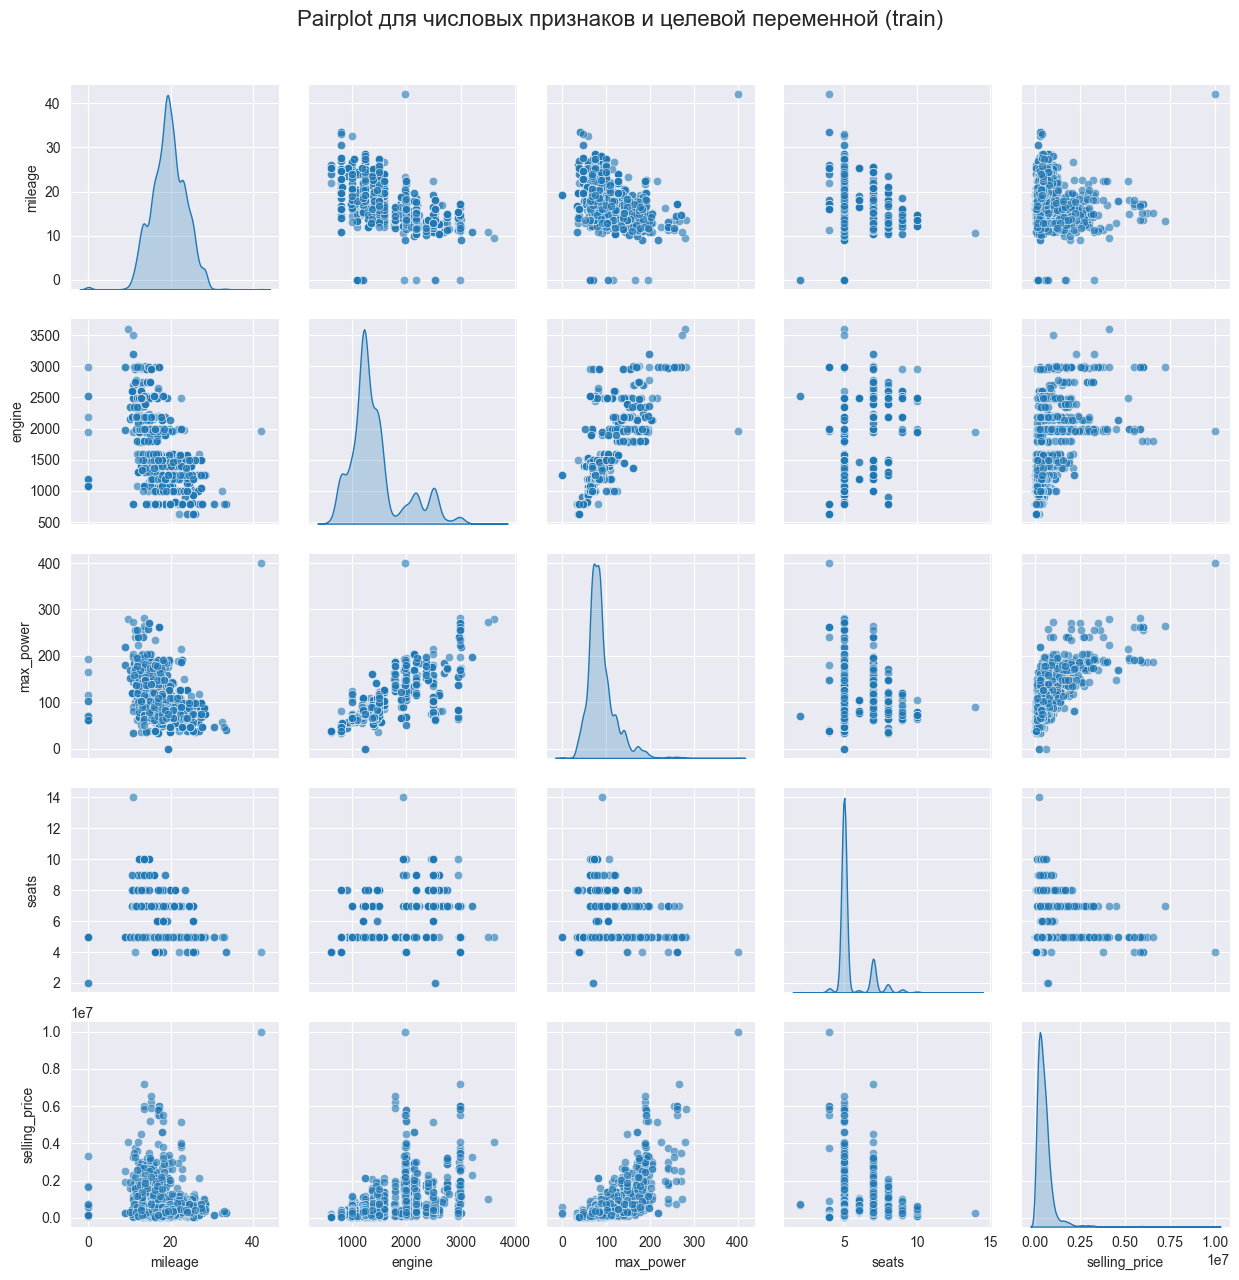

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Выбор числовых признаков и целевой переменной
numeric_features = ['mileage', 'engine', 'max_power', 'seats', 'selling_price']

# Построение pairplot
sns.pairplot(df_train[numeric_features], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot для числовых признаков и целевой переменной (train)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

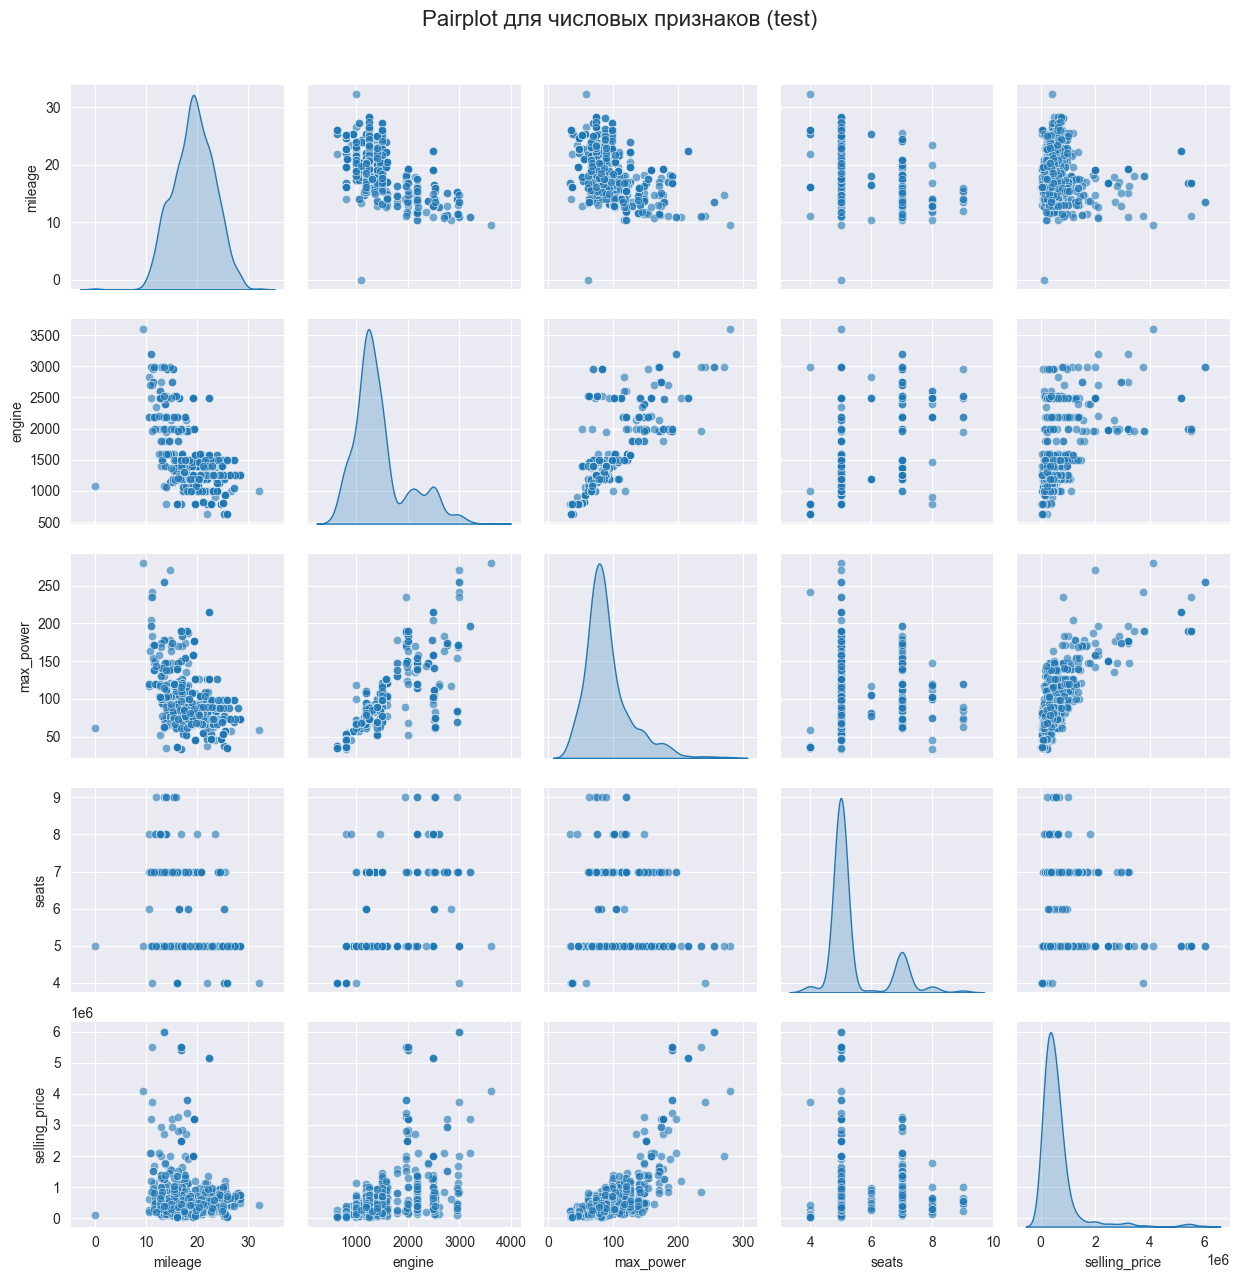

In [13]:
# Построение pairplot
sns.pairplot(df_test[numeric_features], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pairplot для числовых признаков (test)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()


Шаг 1: Анализ pairplot для тренировочного датасета

Можно ли предположить на основе распределений связь признаков с целевой переменной?

Да, можно. На основе pairplot для тренировочного датасета (clipboard.png) можно сделать следующие наблюдения:
max_power (мощность двигателя): Положительная связь с целевой переменной selling_price (цена автомобиля). Чем выше мощность, тем выше цена.
engine (объем двигателя): Положительная связь с selling_price. Больший объем двигателя часто соответствует более высокой цене.
mileage (расход топлива): Отрицательная связь с selling_price. Чем выше расход топлива, тем ниже цена.
seats (количество мест): Слабая связь с selling_price. Однако в некоторых случаях автомобили с большим количеством мест могут быть дороже.
Можно ли предположить на основе распределений выдвинуть гипотезу о корреляциях признаков?
Да, можно. На основе pairplot можно выдвинуть следующие гипотезы:
Между engine и max_power: Положительная корреляция. Больший объем двигателя часто соответствует большей мощности.
Между mileage и max_power: Отрицательная корреляция. Большая мощность часто соответствует большему расходу топлива.
Между mileage и engine: Отрицательная корреляция. Больший объем двигателя часто соответствует большему расходу топлива.


Шаг 2: Сравнение pairplot для тренировочного и тестового датасетов

"Похожими ли оказались совокупности при разделении на трейн и тест?"

На основе pairplot для тестового датасета (clipboard1.png) можно сделать вывод, что распределения признаков на тренировочном и тестовом датасетах похожи. Это хороший знак, так как означает, что данные в тренировочной и тестовой выборках согласованы.


### **Задание 7 (1.5 балла)**

И так, вы выдвинули гипотезы о наличии связи. Теперь давайте оценим эту связь в числах.

**Задание:**
- [ ] Получите значения коэффициента корреляции Пирсона для тренировочного набора данных при помощи `pd.corr()`
- [ ] По полученным корреляциям постройте тепловую карту (`heatmap` из бибилотеки seaborn)


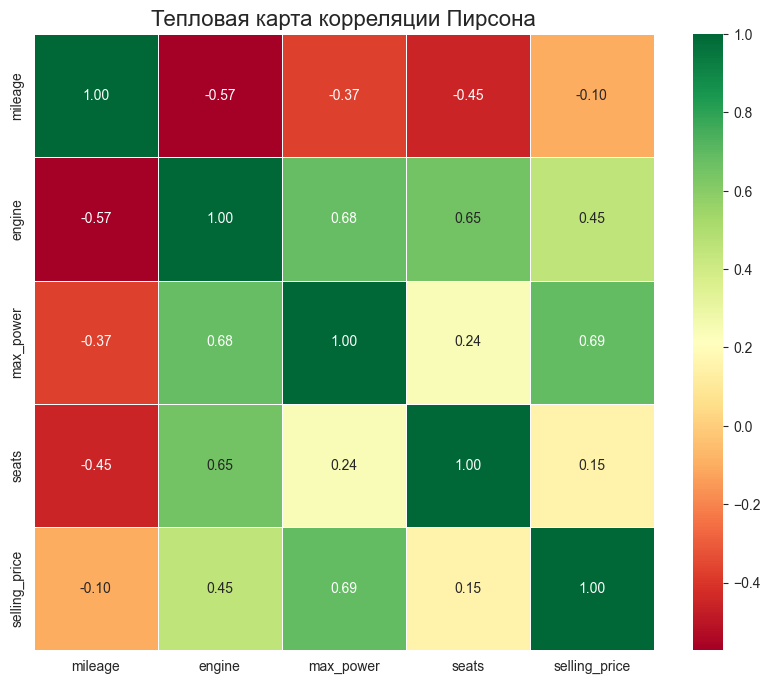

In [14]:
# Выбор числовых признаков и целевой переменной
numeric_features = ['mileage', 'engine', 'max_power', 'seats', 'selling_price']

# Расчет корреляции Пирсона
correlation_matrix = df_train[numeric_features].corr()

# Построение тепловой карты с желтым, зеленым и красным цветами
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', fmt='.2f', linewidths=0.5)
plt.title('Тепловая карта корреляции Пирсона', fontsize=16)
plt.show()

- [ ] Ответьте на вопросы:
 - Какие 2 признака наименее скоррелированы между собой?
 - Между какими наблюдается довольно сильная положительная линейная зависимость?
 - Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи?

1. **Наименее скоррелированные признаки**:
   - Наименее скоррелированными являются **mileage** и **selling_price** с коэффициентом корреляции \(-0.10\). Это означает, что между ними практически отсутствует связь.

2. **Сильная положительная линейная зависимость**:
   - Сильная положительная корреляция наблюдается между **max_power** и **selling_price** с коэффициентом \(0.69\), что указывает на то, что более мощные автомобили имеют более высокую цену.

3. **Утверждение о годе выпуска и пробеге**:
   - В данных, представленных на тепловой карте корреляции, отсутствует прямая информация о **годе выпуска** машины. Поэтому, опираясь только на эти данные, невозможно точно утверждать, что более старые автомобили (с меньшим годом выпуска) имеют больший пробег на момент продажи.

# **Часть 2 | Модель только на вещественных признаках (6.25 балла)**

В этой части вам предстоит обучить модель только на вещественных признаках. Почему только на них?

Чем больше признаковое пространство — чем сложнее модель. А чем модель проще — тем лучше для скорости работы и интерпретации признаков.


### **Задание 8 (0.25 балла)**

Разбейте данные на тренировочный и тестовый наборы. Перед разбиением создайте копию датафрейма, который будет хранить только вещественные признаки и используйте его (то есть категориальные столбцы (все, кроме seats) необходимо удалить).

В переменные y_train и y_test запишите значения целевых переменных.

In [15]:
from sklearn.model_selection import train_test_split

numeric_features = ['mileage', 'year', 'engine', 'max_power', 'seats', 'selling_price', 'km_driven']
df_train_numeric = df_train[numeric_features].copy()

# Удаление целевой переменной для X
X = df_train_numeric.drop(columns=['selling_price'])
y = df_train_numeric['selling_price']

# Сначала все строки отправляем в тренировочную выборку
X_train = X
y_train = y

# Теперь случайным образом выбираем 1000 строк из X_train для теста
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=1000, random_state=42)

# Проверим размеры
print("Размер X_train:", X_train.shape)  # Ожидаем (4840, 6)
print("Размер X_test:", X_test.shape)    # Ожидаем (1000, 6)
print("Размер y_train:", y_train.shape)  # Ожидаем (4840,)
print("Размер y_test:", y_test.shape)    # Ожидаем (1000,)

Размер X_train: (4840, 6)
Размер X_test: (1000, 6)
Размер y_train: (4840,)
Размер y_test: (1000,)


In [16]:
assert X_train.shape == (4840, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

In [17]:
assert X_test.shape == (1000, 6), 'Упс, неверный размер данных. Возможно, вы что-то сделали не так?'

### **Задание 9 (1 балл)**

Построим нашу первую модель!
- [ ] Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и $MSE$ для трейна и для теста.
- [ ] Сделайте выводы по значениям метрик качества.

**Примечание:**

Здесь и далее $R^2$ и $MSE$ для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# Инициализация модели линейной регрессии
model = LinearRegression()

# Обучаем модель на тренировочных данных
model.fit(X_train, y_train)

# Предсказания для тренировочного набора
y_train_pred = model.predict(X_train)

# Предсказания для тестового набора
y_test_pred = model.predict(X_test)

# Рассчитываем R^2 и MSE для тренировочного набора
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

# Рассчитываем R^2 и MSE для тестового набора
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

# Выводим результаты
print("R^2 для тренировки:", r2_train)
print("MSE для тренировки:", mse_train)
print("R^2 для теста:", r2_test)
print("MSE для теста:", mse_test)

R^2 для тренировки: 0.5972559922813174
MSE для тренировки: 106024510953.12016
R^2 для теста: 0.5582806989638069
MSE для теста: 176417613091.92365


### **Задание 10 (0.75 балла)**

Всегда есть место совершенству. Поэтому давайте попробуем улучшить модель. При помощи стандартизации признаков.

- [ ] Стандартизируйте значения в тренировочных и тестовых данных. Стандартизатор **обучайте только на `train`**.

In [19]:
from sklearn.preprocessing import StandardScaler

# Стандартизируем данные. Обучаем стандартизатор только на тренировочных данных
scaler = StandardScaler()

# Обучаем на тренировочных данных и преобразуем X_train
X_train_scaled = scaler.fit_transform(X_train)

# Применяем те же параметры стандартизации на тестовые данные
X_test_scaled = scaler.transform(X_test)

# Инициализация и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Предсказания для тренировочного набора
y_train_pred = model.predict(X_train_scaled)

# Предсказания для тестового набора
y_test_pred = model.predict(X_test_scaled)

# Рассчитываем R^2 и MSE для тренировочного набора
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

# Рассчитываем R^2 и MSE для тестового набора
r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

# Выводим результаты
print("R^2 для тренировки (стандартизированные данные):", r2_train)
print("MSE для тренировки (стандартизированные данные):", mse_train)
print("R^2 для теста (стандартизированные данные):", r2_test)
print("MSE для теста (стандартизированные данные):", mse_test)
# your code here

R^2 для тренировки (стандартизированные данные): 0.5972559922813172
MSE для тренировки (стандартизированные данные): 106024510953.12022
R^2 для теста (стандартизированные данные): 0.5582806989636726
MSE для теста (стандартизированные данные): 176417613091.97733


### **Задание 11 (0.5 балла)**

Хотя стандартизация не помогла сильно прибавить в качестве она открыла возможность интерпретировать важность признаков в модели. Правило интерпретации такое:

Чем больше коэффициент $\beta_i$ по модулю, тем важнее признак.

**Ответьте на вопрос:**

- [ ] Какой признак оказался наиболее информативным в предсказании цены?

In [20]:
# Получаем коэффициенты модели
coefficients = model.coef_

# Составляем список признаков и их коэффициентов
feature_importance = list(zip(X.columns, coefficients))

# Сортируем по абсолютному значению коэффициента
feature_importance_sorted = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Выводим наибольший коэффициент и его соответствующий признак
print("Наиболее информативный признак:", feature_importance_sorted[0])

Наиболее информативный признак: ('max_power', np.float64(287360.50904493383))


### **Задание 12 (1.25 балла)**

Попробуем улучшить нашу модель с помощью применения регуляризации. Для этого воспльзуемся `Lasso` регрессией.  Кроме того, попробуйте использовать её теоретическое свойство отбора признаков, за счет зануления незначимых коэффициентов.

**Задание:**

- [ ] Обучите Lasso регрессию на тренировочном наборе данных с нормализованными признаками. Оцените её качество
- [ ] Проверьте, занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Предположите почему.

In [21]:
from sklearn.linear_model import Lasso

# Стандартизируем данные (если ещё не сделали)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Инициализация модели Lasso (с дефолтными параметрами)
lasso_model = Lasso()

# Обучаем модель Lasso
lasso_model.fit(X_train_scaled, y_train)

# Предсказания на тренировочной и тестовой выборке
y_train_pred = lasso_model.predict(X_train_scaled)
y_test_pred = lasso_model.predict(X_test_scaled)

# Оценка качества модели
r2_train = r2_score(y_train, y_train_pred)
mse_train = MSE(y_train, y_train_pred)

r2_test = r2_score(y_test, y_test_pred)
mse_test = MSE(y_test, y_test_pred)

# Выводим результаты
print("R^2 для тренировки (Lasso):", r2_train)
print("MSE для тренировки (Lasso):", mse_train)
print("R^2 для теста (Lasso):", r2_test)
print("MSE для теста (Lasso):", mse_test)

# Проверим коэффициенты модели
coefficients = lasso_model.coef_

# Выводим зануленные коэффициенты
print("Коэффициенты модели Lasso:", coefficients)

R^2 для тренировки (Lasso): 0.5972559922491458
MSE для тренировки (Lasso): 106024510961.58951
R^2 для теста (Lasso): 0.5582813215397444
MSE для теста (Lasso): 176417364442.2482
Коэффициенты модели Lasso: [ 18716.10991228 150493.6795191   84181.67766182 287361.22359134
 -28404.66695583 -59852.81157863]


In [22]:
# Проверка на зануленные коэффициенты
zero_coeffs = [X.columns[i] for i in range(len(coefficients)) if coefficients[i] == 0]

print("Зануленные признаки:", zero_coeffs)

Зануленные признаки: []


Скорее всего признаки слабо коррелируют с целевой переменной или не содержат полезной информации для предсказания.

### **Задание 13 Финальный рывок (2.5 балла)**

До этого мы с вами использовали `train` для обучения и `test` для прогнозирования. Но у нас есть ещё одна задача — подобрать оптимальные параметры модели. Для этого используем кросс-валидацию, описанную на семинарах.

Кроме того, выжмем максимум из модификаций регрессии. Построим `ElasticNet`. И сделаем всё по порядку.

**Ваша задача 1:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии. Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).
- [ ] Ответьте на вопросы:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?

In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Определим диапазон значений для параметра alpha (коэффициент регуляризации)
param_grid = {'alpha': [0.1, 0.5, 1, 5, 10, 50, 100]}

# Инициализация модели Lasso
lasso_model = Lasso()

# Настройка кросс-валидации с 10 фолдами
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Настройка GridSearchCV для поиска оптимального параметра alpha
grid_search = GridSearchCV(estimator=lasso_model, param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error', n_jobs=-1)

# Обучение модели с использованием GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Получаем результаты
best_alpha = grid_search.best_params_['alpha']
best_model = grid_search.best_estimator_

# Количество моделей, обученных GridSearchCV
num_models_trained = len(grid_search.cv_results_['mean_test_score'])

# Предсказания для тренировочной и тестовой выборки с оптимальной моделью
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Оценка качества модели
mse_train = MSE(y_train, y_train_pred)
mse_test = MSE(y_test, y_test_pred)

# Коэффициенты модели для анализа
coefficients = best_model.coef_

# Зануленные коэффициенты
zero_coeffs = [X.columns[i] for i in range(len(coefficients)) if coefficients[i] == 0]

# Вывод результатов
print(f"Количество моделей, обученных GridSearchCV: {num_models_trained}")
print(f"Оптимальный коэффициент регуляризации (alpha): {best_alpha}")
print(f"Зануленные признаки: {zero_coeffs}")
print(f"MSE для тренировки с оптимальной моделью: {mse_train}")
print(f"MSE для теста с оптимальной моделью: {mse_test}")

Количество моделей, обученных GridSearchCV: 7
Оптимальный коэффициент регуляризации (alpha): 100
Зануленные признаки: []
MSE для тренировки с оптимальной моделью: 106024599445.04701
MSE для теста с оптимальной моделью: 176392302084.428


**Ваша задача 2:**

- [ ] Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) регрессии.
- [ ] Ответьте на вопрос:
 - Сколько грид-сёрчу пришлось обучать моделей?
 - Какие гиперпараметры соответствуют лучшей (по выбранной метрике качества) из перебранных моделей?

In [24]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Определение модели ElasticNet
model = ElasticNet(max_iter=10000, tol=1e-2)

# Определение сетки гиперпараметров
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Параметр регуляризации
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]  # Соотношение L1 и L2 регуляризации
}

# GridSearchCV с 10 фолдами
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='r2', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Лучшие параметры и лучшая модель
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Предсказание на тренировочном и тестовом наборах
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Расчет метрик
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Вывод результатов
print(f"Лучшие параметры: {best_params}")
print(f"R^2 на тренировочном наборе: {train_r2:.4f}")
print(f"R^2 на тестовом наборе: {test_r2:.4f}")
print(f"MSE на тренировочном наборе: {train_mse:.4f}")
print(f"MSE на тестовом наборе: {test_mse:.4f}")

# Ответ на вопрос: Сколько моделей пришлось обучить?
n_models = len(param_grid['alpha']) * len(param_grid['l1_ratio']) * 10  # 10 фолдов
print(f"Количество моделей, обученных в процессе GridSearch: {n_models}")

Лучшие параметры: {'alpha': 1, 'l1_ratio': 0.9}
R^2 на тренировочном наборе: 0.5972
R^2 на тестовом наборе: 0.5583
MSE на тренировочном наборе: 106039247660.7662
MSE на тестовом наборе: 176411880047.7092
Количество моделей, обученных в процессе GridSearch: 250


# **Часть 3| Добавляем категориальные фичи (3.75 балла)**

Попробуем для улучшения модели дать ей больше признаков. Добавим категориальные фичи.


### **Задание 14 (0.5 балла)** Проанализируйте столбец `name`. Очевидно, что эта переменная является категориальной, однако категорий в ней много.

В этом домашнем задании мы предлагаем удалить его.

**Ваша задача:**
1. Удалить столбец`name`
2. Снова объединить категориальные с вещественными признаками.

In [25]:
# Удаление столбца 'name'
df_train = df_train.drop(columns=['name'])

# Выбор числовых и категориальных признаков
numeric_features = ['mileage', 'year', 'engine', 'max_power', 'seats', 'selling_price', 'km_driven']
categorical_features = ['fuel', 'seller_type', 'transmission', 'owner']

# Создание копии датафрейма с числовыми и категориальными признаками
df_train_features = df_train[numeric_features + categorical_features].copy()

# Проверка результата
print("Размер датафрейма после удаления 'name' и преобразования категориальных признаков:")
print(df_train_features.shape)
print("\nПервые 5 строк датафрейма:")
print(df_train_features.head())

Размер датафрейма после удаления 'name' и преобразования категориальных признаков:
(5840, 11)

Первые 5 строк датафрейма:
   mileage  year  engine  max_power  seats  selling_price  km_driven    fuel  \
0    23.40  2014    1248      74.00      5         450000     145500  Diesel   
1    21.14  2014    1498     103.52      5         370000     120000  Diesel   
2    23.00  2010    1396      90.00      5         225000     127000  Diesel   
3    16.10  2007    1298      88.20      5         130000     120000  Petrol   
4    20.14  2017    1197      81.86      5         440000      45000  Petrol   

  seller_type transmission         owner  
0  Individual       Manual   First Owner  
1  Individual       Manual  Second Owner  
2  Individual       Manual   First Owner  
3  Individual       Manual   First Owner  
4  Individual       Manual   First Owner  


### **Задание 15 (2 балла)**

- [ ] Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования. Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [26]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# Преобразование категориальных признаков и 'seats' с помощью OneHot Encoding
encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' для удаления одного столбца
encoded_features = encoder.fit_transform(df_train_features[categorical_features])

# Создание DataFrame из закодированных признаков
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_features))

# Объединение числовых признаков с закодированными категориальными признаками
df_train_encoded = pd.concat([df_train_features[numeric_features], encoded_df], axis=1)

# Проверка результата
print("Размер датафрейма после One-Hot Encoding:")
print(df_train_encoded.shape)
print("\nПервые 5 строк датафрейма:")
print(df_train_encoded.head())

Размер датафрейма после One-Hot Encoding:
(5840, 17)

Первые 5 строк датафрейма:
   mileage  year  engine  max_power  seats  selling_price  km_driven  \
0    23.40  2014    1248      74.00      5         450000     145500   
1    21.14  2014    1498     103.52      5         370000     120000   
2    23.00  2010    1396      90.00      5         225000     127000   
3    16.10  2007    1298      88.20      5         130000     120000   
4    20.14  2017    1197      81.86      5         440000      45000   

   fuel_Diesel  fuel_LPG  fuel_Petrol  seller_type_Individual  \
0          1.0       0.0          0.0                     1.0   
1          1.0       0.0          0.0                     1.0   
2          1.0       0.0          0.0                     1.0   
3          0.0       0.0          1.0                     1.0   
4          0.0       0.0          1.0                     1.0   

   seller_type_Trustmark Dealer  transmission_Manual  \
0                           0.0        

### **Задание 16 (1.25 балла)**
Повторим то, что делали на прошлом шаге для моделей на вещественных признаках, однако теперь с моделью `Ridge`.


**Ваша задача:**
- [ ] Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV` В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.
- [ ] Ответье на вопрос: Удалось ли улучшить качество прогнозов?

In [27]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# Определение параметров для GridSearchCV
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100, 1000]}

# Создание модели Ridge
ridge_model = Ridge()

# GridSearchCV с кросс-валидацией по 10 фолдам
grid_search = GridSearchCV(ridge_model, param_grid, cv=10, scoring='r2')
grid_search.fit(X_train, y_train)

# Лучший параметр alpha
best_alpha = grid_search.best_params_['alpha']
print(f"Лучший параметр alpha: {best_alpha}")

# Обучение модели с лучшим параметром alpha
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)

# Предсказание на тренировочном и тестовом наборах
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Расчет метрик R^2
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Вывод результатов
print(f"R^2 на тренировочном наборе: {train_r2:.4f}")
print(f"R^2 на тестовом наборе: {test_r2:.4f}")

Лучший параметр alpha: 1000
R^2 на тренировочном наборе: 0.5971
R^2 на тестовом наборе: 0.5581


# **Часть 4 (7 баллов) | Классификация**



In [28]:
%pylab inline
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/yaroslavlaptev/PycharmProjects/python_for_andan/.venv/lib/python3.13/site-packages/IPython/core/magics/pylab.py:166: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [29]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

### **Задание 13 (2 балла)**
Обучите логистическую регрессию на синтетических данных.

In [30]:
# Создание и обучение модели логистической регрессии
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Предсказание на тестовом наборе
y_pred = model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Вывод результатов
print("Точность модели:", accuracy)
print("\nМатрица ошибок:")
print(conf_matrix)
print("\nОтчет о классификации:")
print(class_report)

Точность модели: 0.8486666666666667

Матрица ошибок:
[[12794  2244]
 [ 2296 12666]]

Отчет о классификации:
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     15038
           1       0.85      0.85      0.85     14962

    accuracy                           0.85     30000
   macro avg       0.85      0.85      0.85     30000
weighted avg       0.85      0.85      0.85     30000



На тестовой части посчитайте ROC-AUC, PR-AUC. Самостоятельно изучите, что такое PR-AUC.

Постройте ROC и PR кривые. Проинтерпретируйте результат.

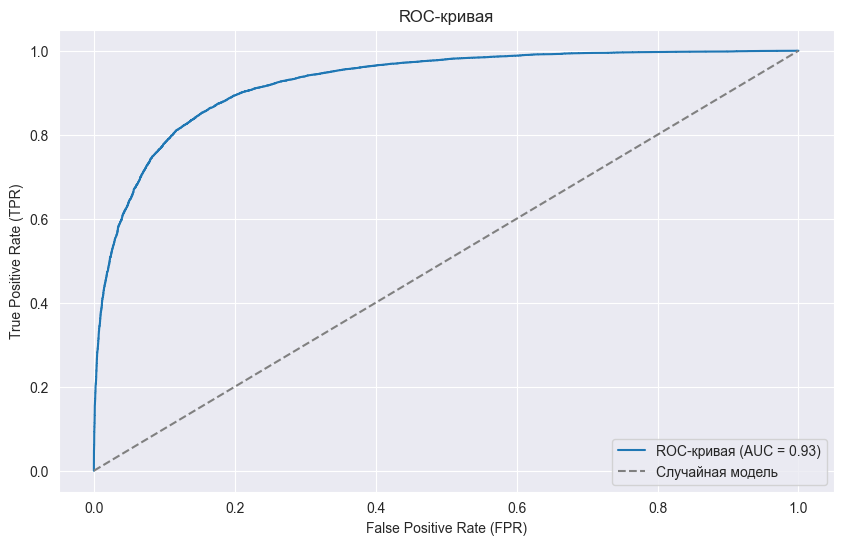

In [31]:
from sklearn.metrics import (
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    auc
)

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Создание и обучение модели логистической регрессии
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Предсказание вероятностей на тестовом наборе
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Расчет ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Расчет PR-AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Построение ROC-кривой
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC-кривая (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Случайная модель')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC-кривая')
plt.legend()
plt.show()

### **Задание 14 (2 балла)**

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом для задания мы немного модифицируем датасет.

In [32]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Посчитайте качество (выведите все метрики классификации) на train и test при применении логистической регрессии.

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

from sklearn.preprocessing import StandardScaler

# Масштабирование данных
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Применение логистической регрессии
model = LogisticRegression(max_iter=10, random_state=124)
model.fit(X_train, y_train)

# Предсказания на тренировочном и тестовом наборах
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Предсказания вероятностей для расчета ROC-AUC
y_train_proba = model.predict_proba(X_train)[:, 1]
y_test_proba = model.predict_proba(X_test)[:, 1]

# Расчет метрик качества
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    return accuracy, precision, recall, f1, roc_auc

# Метрики на тренировочном наборе
train_metrics = evaluate_model(y_train, y_train_pred, y_train_proba)
print("Метрики на тренировочном наборе:")
print(f"Accuracy: {train_metrics[0]:.4f}")
print(f"Precision: {train_metrics[1]:.4f}")
print(f"Recall: {train_metrics[2]:.4f}")
print(f"F1-score: {train_metrics[3]:.4f}")
print(f"ROC-AUC: {train_metrics[4]:.4f}")

# Метрики на тестовом наборе
test_metrics = evaluate_model(y_test, y_test_pred, y_test_proba)
print("\nМетрики на тестовом наборе:")
print(f"Accuracy: {test_metrics[0]:.4f}")
print(f"Precision: {test_metrics[1]:.4f}")
print(f"Recall: {test_metrics[2]:.4f}")
print(f"F1-score: {test_metrics[3]:.4f}")
print(f"ROC-AUC: {test_metrics[4]:.4f}")

/Users/yaroslavlaptev/PycharmProjects/python_for_andan/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/yaroslavlaptev/PycharmProjects/python_for_andan/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Метрики на тренировочном наборе:
Accuracy: 0.9635
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.4945

Метрики на тестовом наборе:
Accuracy: 0.9637
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.4900


/Users/yaroslavlaptev/PycharmProjects/python_for_andan/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### **Задание 15 (2 балла)**

Закодируйте все категориальные признаки с помощью one-hot-кодирования, а числовые признаки масштабируйте. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до предобработки). Измерьте время, потребовавшееся на обучение модели. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

# Загрузка данных
data = pd.read_csv('train.csv', index_col=0)

# Разделение на целевую переменную и признаки
target = data.target.values
data = data.drop('target', axis=1)

# Определение категориальных и числовых признаков
categorical_features = data.select_dtypes(include=['object', 'category']).columns
numeric_features = data.select_dtypes(include=['int', 'float']).columns

# Предобработка данных
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ])

# Создание пайплайна
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=124))
])

# Разбиение на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

# Измерение времени обучения
start_time = time.time()
pipeline.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

# Предсказания на тренировочном и тестовом наборах
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Предсказания вероятностей для расчета ROC-AUC
y_train_proba = pipeline.predict_proba(X_train)[:, 1]
y_test_proba = pipeline.predict_proba(X_test)[:, 1]

# Расчет метрик качества
def evaluate_model(y_true, y_pred, y_proba):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, y_proba)
    return accuracy, precision, recall, f1, roc_auc

# Метрики на тренировочном наборе
train_metrics = evaluate_model(y_train, y_train_pred, y_train_proba)
print("Метрики на тренировочном наборе:")
print(f"Accuracy: {train_metrics[0]:.4f}")
print(f"Precision: {train_metrics[1]:.4f}")
print(f"Recall: {train_metrics[2]:.4f}")
print(f"F1-score: {train_metrics[3]:.4f}")
print(f"ROC-AUC: {train_metrics[4]:.4f}")

# Метрики на тестовом наборе
test_metrics = evaluate_model(y_test, y_test_pred, y_test_proba)
print("\nМетрики на тестовом наборе:")
print(f"Accuracy: {test_metrics[0]:.4f}")
print(f"Precision: {test_metrics[1]:.4f}")
print(f"Recall: {test_metrics[2]:.4f}")
print(f"F1-score: {test_metrics[3]:.4f}")
print(f"ROC-AUC: {test_metrics[4]:.4f}")

# Время обучения
print(f"\nВремя обучения модели: {training_time:.2f} секунд")

# Количество признаков после предобработки
preprocessed_features = preprocessor.transform(data).shape[1]
print(f"Количество признаков после предобработки: {preprocessed_features}")

/Users/yaroslavlaptev/PycharmProjects/python_for_andan/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Метрики на тренировочном наборе:
Accuracy: 0.9635
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.6222

Метрики на тестовом наборе:
Accuracy: 0.9637
Precision: 0.0000
Recall: 0.0000
F1-score: 0.0000
ROC-AUC: 0.6278

Время обучения модели: 1.59 секунд


/Users/yaroslavlaptev/PycharmProjects/python_for_andan/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Количество признаков после предобработки: 57


### **Задание 16 (1 балла)**

Давайте попробуем использовать SGDClassifier для улучшения качества модели. Улучшились ли метрики и качество в целом на трейне и тесте? Используйте GreedSearchCV

In [35]:
print('Hello world (')

Hello world (
